### heirrchy

In [56]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import *
from scipy.cluster.hierarchy import linkage,dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN


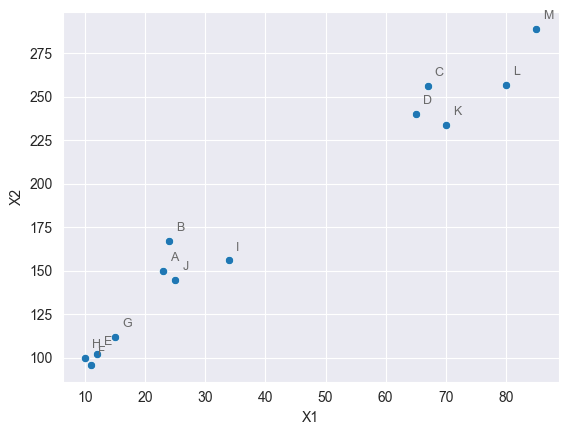

In [4]:
df=pd.read_csv(r"D:\Datasets\simp_clust.csv",index_col=0)
ax=sns.scatterplot(data=df,x='X1',y='X2',legend='auto')
for i in range(len(df)):
    ax.annotate(
        # The text label is the index value
        text=df.index[i],
        # The point coordinates are (X1, X2)
        xy=(df['X1'].iloc[i], df['X2'].iloc[i]),
        # Offset the text slightly from the point
        xytext=(5, 5),
        textcoords='offset points',
        ha='left',
        va='bottom',
        fontsize=9,
        color='dimgrey'
    )

plt.show()

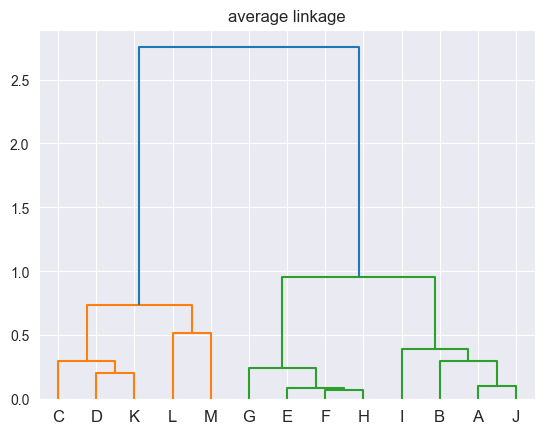

In [5]:
scaler=StandardScaler().set_output(transform='pandas')
df_scaled=scaler.fit_transform(df)
merging=linkage(df_scaled,method="average")
dendrogram(merging,labels=list(df_scaled.index))
plt.title("average linkage")
plt.show()

In [6]:
df.shape

(13, 2)

### custering

In [8]:
clust = AgglomerativeClustering(n_clusters = 3)
clust.fit(df_scaled)
clust.labels_

array([1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0])

In [9]:
df_copy = df.copy()
df_copy['label'] = clust.labels_
df_copy.sort_values('label')

,X1,X2,label
Name,,,
D,65,240,0
C,67,256,0
K,70,234,0
L,80,257,0
M,85,289,0
J,25,145,1
B,24,167,1
A,23,150,1
I,34,156,1


### metrics

In [13]:
clusters = [2,3,4,5,6,7]
linkages = ['ward','single','complete','average']
scores = []
for l in linkages:
    for c in clusters:
        clust = AgglomerativeClustering(linkage = l,n_clusters = c)
        clust.fit(df_scaled)
        scores.append([l,c,silhouette_score(df_scaled,clust.labels_)])
df_scores = pd.DataFrame(scores,columns = ['linkage','cluster','score'])
df_scores.sort_values('score',ascending = False)

,linkage,cluster,score
0,ward,2,0.768625
6,single,2,0.768625
18,average,2,0.768625
12,complete,2,0.768625
13,complete,3,0.748692
19,average,3,0.748692
7,single,3,0.748692
1,ward,3,0.748692
14,complete,4,0.642185
20,average,4,0.642185


In [16]:
df

,X1,X2
Name,,
A,23,150
B,24,167
C,67,256
D,65,240
E,12,102
F,11,96
G,15,112
H,10,100
I,34,156


`milk ds`

In [67]:
data=pd.read_csv(r"D:\Datasets\milk.csv",index_col=0)

In [15]:
data

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [18]:
import plotly.express as px
import pandas as pd
import numpy as np

# Generate sample data with 5 features
np.random.seed(42)
n_samples = 200

data = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, n_samples),
    'Feature2': np.random.normal(5, 2, n_samples),
    'Feature3': np.random.exponential(2, n_samples),
    'Feature4': np.random.uniform(-10, 10, n_samples),
    'Feature5': np.random.gamma(2, 2, n_samples),
    'Category': np.random.choice(['A', 'B', 'C'], n_samples)
})

# Create interactive 3D scatter plot
fig = px.scatter_3d(data,
                   x='Feature1',
                   y='Feature2',
                   z='Feature3',
                   color='Feature4',  # 4th feature as color
                   size='Feature5',   # 5th feature as size
                   hover_data=['Feature4', 'Feature5', 'Category'],
                   color_continuous_scale='viridis',
                   title="Interactive 3D Scatter Plot with 5 Features",
                   width=800,
                   height=600)

# Customize the layout
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    coloraxis_colorbar=dict(title="Feature 4"),
    legend=dict(title="Features")
)

# Show the plot
fig.show()

In [ ]:
df = pd.read_csv(r"D:\Datasets\milk.csv", index_col=0)
df.head()
n_clusters = [x for x in range(2, 11)]
linkage = ['ward', 'average', 'complete', 'single']
score = []
for n in n_clusters:
    for dist in linkage:
        cluster = AgglomerativeClustering(n_clusters=n, linkage=dist)
        cluster.fit(df)
        score.append([n, dist, silhouette_score(df, cluster.labels_)])

df_scores = pd.DataFrame(data=score, columns=['n_clusters', 'linakge', 'silhouette_score'])
df_scores.sort_values(by='silhouette_score', ascending=False)
n_clusters = [x for x in range(2, 8)]

`nutrient`

In [20]:
data = pd.read_csv(r"D:\Datasets\nutrient.csv")
data

,Food_Item,energy,protein,fat,calcium,iron
0,BEEF BRAISED,340,20,28,9,2.6
1,HAMBURGER,245,21,17,9,2.7
2,BEEF ROAST,420,15,39,7,2.0
3,BEEF STEAK,375,19,32,9,2.6
4,BEEF CANNED,180,22,10,17,3.7
5,CHICKEN BROILED,115,20,3,8,1.4
6,CHICKEN CANNED,170,25,7,12,1.5
7,BEEF HEART,160,26,5,14,5.9
8,LAMB LEG ROAST,265,20,20,9,2.6
9,LAMB SHOULDER ROAST,300,18,25,9,2.3


In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create multiple 3D views
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=('F1,F2,F3 (Color:F4, Size:F5)', 'F1,F4,F5 (Color:F2, Size:F3)',
                   'F2,F3,F4 (Color:F5, Size:F1)', 'F3,F4,F5 (Color:F1, Size:F2)'),
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

# View 1: Features 1,2,3 with 4,5 as color/size
fig.add_trace(go.Scatter3d(
    x=data['Feature1'], y=data['Feature2'], z=data['Feature3'],
    mode='markers',
    marker=dict(
        size=data['Feature5']/data['Feature5'].max()*20,
        color=data['Feature4'],
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(x=0.45, y=0.5)
    ),
    text=[f"F4: {f4:.2f}<br>F5: {f5:.2f}" for f4, f5 in zip(data['Feature4'], data['Feature5'])],
    hoverinfo='text'
), row=1, col=1)

# View 2: Different feature combination
fig.add_trace(go.Scatter3d(
    x=data['Feature1'], y=data['Feature4'], z=data['Feature5'],
    mode='markers',
    marker=dict(
        size=data['Feature3']/data['Feature3'].max()*20,
        color=data['Feature2'],
        colorscale='Plasma',
        opacity=0.7
    ),
    text=[f"F2: {f2:.2f}<br>F3: {f3:.2f}" for f2, f3 in zip(data['Feature2'], data['Feature3'])],
    hoverinfo='text'
), row=1, col=2)

# Add more views as needed...

fig.update_layout(height=800, width=1000,
                  title_text="Multiple 3D Views of 5D Data",
                  showlegend=False)
fig.show()

In [69]:
scaler =StandardScaler().set_output(transform='pandas')
# data[1:]=scaler.fit_transform(data[1:])
data = scaler.fit_transform(data)

In [27]:
merging=linkage(data,method="complete")
dendrogram(merging,labels=list(df_scaled.index))
plt.title("average linkage")
plt.show()

ValueError: could not convert string to float: 'A'

In [ ]:
clusters = [2,3,4,5,6,7]
linkages = ['ward','single','complete','average']
scores = []
for l in linkages:
    for c in clusters:
        clust = AgglomerativeClustering(linkage = l,n_clusters = c)
        clust.fit(df_scaled)
        scores.append([l,c,silhouette_score(df_scaled,clust.labels_)])
df_scores = pd.DataFrame(scores,columns = ['linkage','cluster','score'])
df_scores.sort_values('score',ascending = False)

### K Means clustering, withn sum of squares

In [31]:
data = pd.read_csv(r'D:\Datasets\milk.csv',index_col= 0)
data

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [41]:
data = scaler.fit_transform(data)

In [38]:
model = KMeans(random_state = 25,n_clusters = 3)
model.fit(data)
print(model.labels_)
model.inertia_

[1 1 1 1 1 2 2 2 2 2 2 2 1 2 1 2 2 2 0 0 0 0 0 0 0]


36.59621161459346

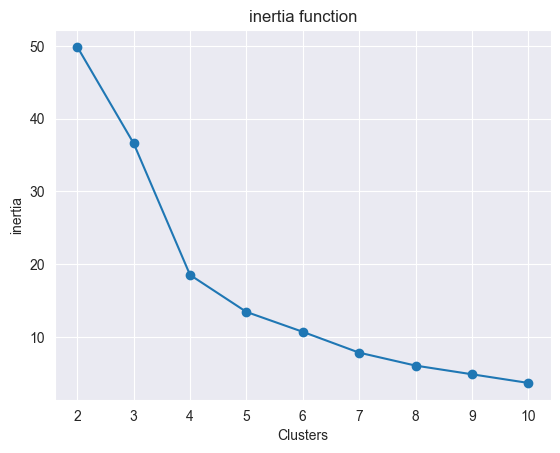

In [39]:
inertia = []
for i in range(2,11):
    model = KMeans(random_state = 25,n_clusters = i)
    model.fit(data)
    inertia.append([i,model.inertia_])
df_inertia = pd.DataFrame(inertia,columns = ['clusters','inertia'])
plt.scatter(df_inertia['clusters'],df_inertia['inertia'])
plt.plot(df_inertia['clusters'],df_inertia['inertia'])
plt.xlabel('Clusters')
plt.ylabel('inertia')
plt.title('inertia function')
plt.show()

In [ ]:
#### elbow at 4, so choose model tuned with k = 4

`milk`

### with silhoutte score

In [57]:
scores = []
for c in range(2,11):
    clust = KMeans(random_state = 25,n_clusters = c)
    clust.fit(data)
    scores.append([c,silhouette_score(data,clust.labels_)])
pd.DataFrame(scores,columns = ['c','sc']).sort_values('sc',ascending = False)

,c,sc
1,3,0.656372
0,2,0.625159
4,6,0.610626
2,4,0.600379
3,5,0.600108
5,7,0.565411
6,8,0.481536
7,9,0.423610
8,10,0.344640


### choosed the best estimator and build it again

In [58]:
data_copy = data.copy()
model = KMeans(random_state = 25,n_clusters =3)
model.fit(data)
data_copy['label'] = model.labels_
df_copy.groupby('label').mean()

,X1,X2
label,,
0,73.4,255.2
1,26.5,154.5
2,12.0,102.5


`milk`

In [73]:
eps = [0.2,0.4,0.6,0.8,1]
min_samples = [2,3,4,5]
scores = []
for e in eps:
    for m in min_samples:
        model = DBSCAN(eps =e,min_samples = m)
        model.fit(data)
        if len(np.unique(model.labels_[model.labels_!=-1]))<2: continue
        scores.append([e,m,silhouette_score(data,model.labels_)])
pd.DataFrame(scores,columns = ['eps','min_samples','score']).sort_values('score',ascending = False)

,eps,min_samples,score
9,1.0,3,0.343466
8,1.0,2,0.267676
5,0.8,2,0.234364
6,0.8,3,0.210201
3,0.6,3,0.171642
7,0.8,4,0.168299
4,0.6,4,0.153807
2,0.6,2,0.111288
0,0.4,2,-0.046044
1,0.4,3,-0.105101
